# Import package

In [1]:
import os
import torch
import pandas as pd
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning import loggers
from pytorch_lightning.callbacks import ModelCheckpoint

In [2]:
%load_ext autoreload
%autoreload 2

# Setup environment

In [3]:
device = "cuda" if torch.cuda.is_available else "cpu"

def format_bytes(size):
    # 2**10 = 1024
    power = 2**10
    n = 0
    power_labels = {0 : '', 1: 'kilo', 2: 'mega', 3: 'giga', 4: 'tera'}
    while size > power:
        size /= power
        n += 1
    return "%.2f" % size, power_labels[n] + 'bytes'

torch.cuda.get_device_name(), format_bytes(torch.cuda.get_device_properties(device).total_memory)

('GeForce GTX 1080 Ti', ('10.92', 'gigabytes'))

# Load model

In [4]:
from trainer.distill.outliers import OutliersTrainer
model = OutliersTrainer()
max_epoches = model.get_max_epoches()

>> Load from data frame


>> The transformation of student is
<function apply_policy at 0x7fa64f6fe790>
>> Return trainloader
>> Return valloader


>> Load from pretrained


Using cache found in /home/kientiet/.cache/torch/hub/facebookresearch_semi-supervised-ImageNet1K-models_master


Here 0.8
>> Load from data frame


Using cache found in /home/kientiet/.cache/torch/hub/facebookresearch_semi-supervised-ImageNet1K-models_master




>> Running with 1cycle scheduler


>> Running with exp scheduler


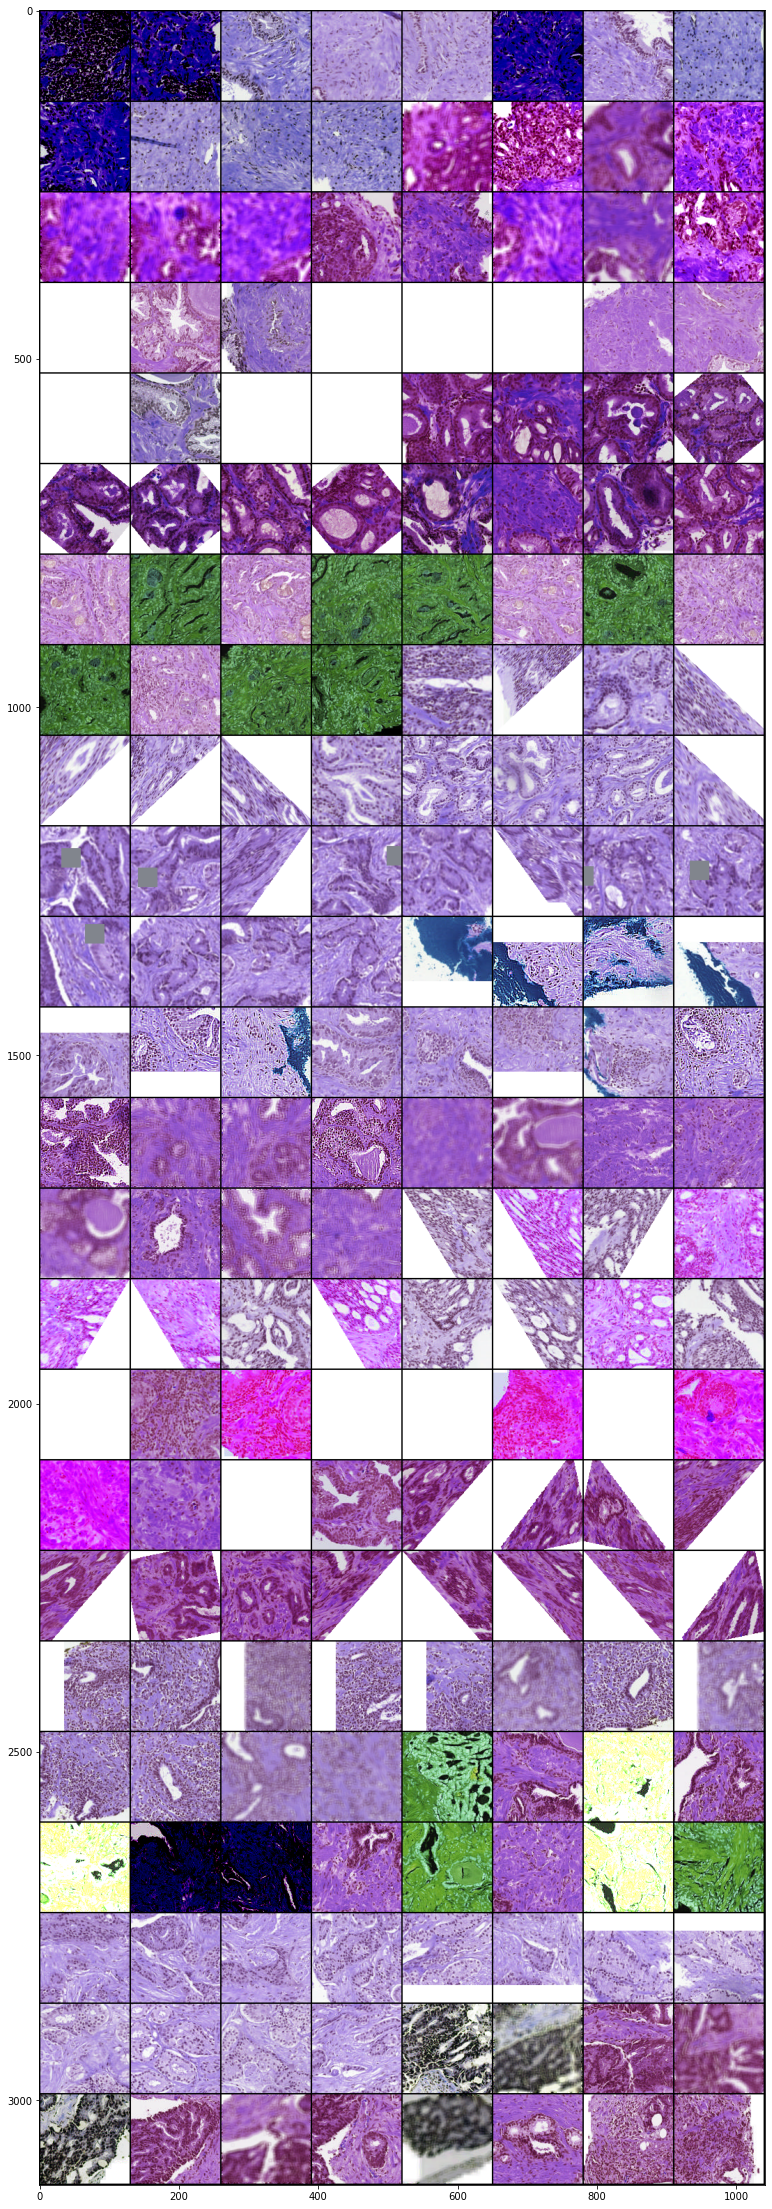

In [5]:
import torchvision
import matplotlib.pyplot as plt
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
plt.figure(figsize=(20,40))
student_images, teacher_images, labels = next(iter(model.trainloader))
student_images = student_images.reshape(-1, 3, 128, 128)
# show images
imshow(torchvision.utils.make_grid(student_images))

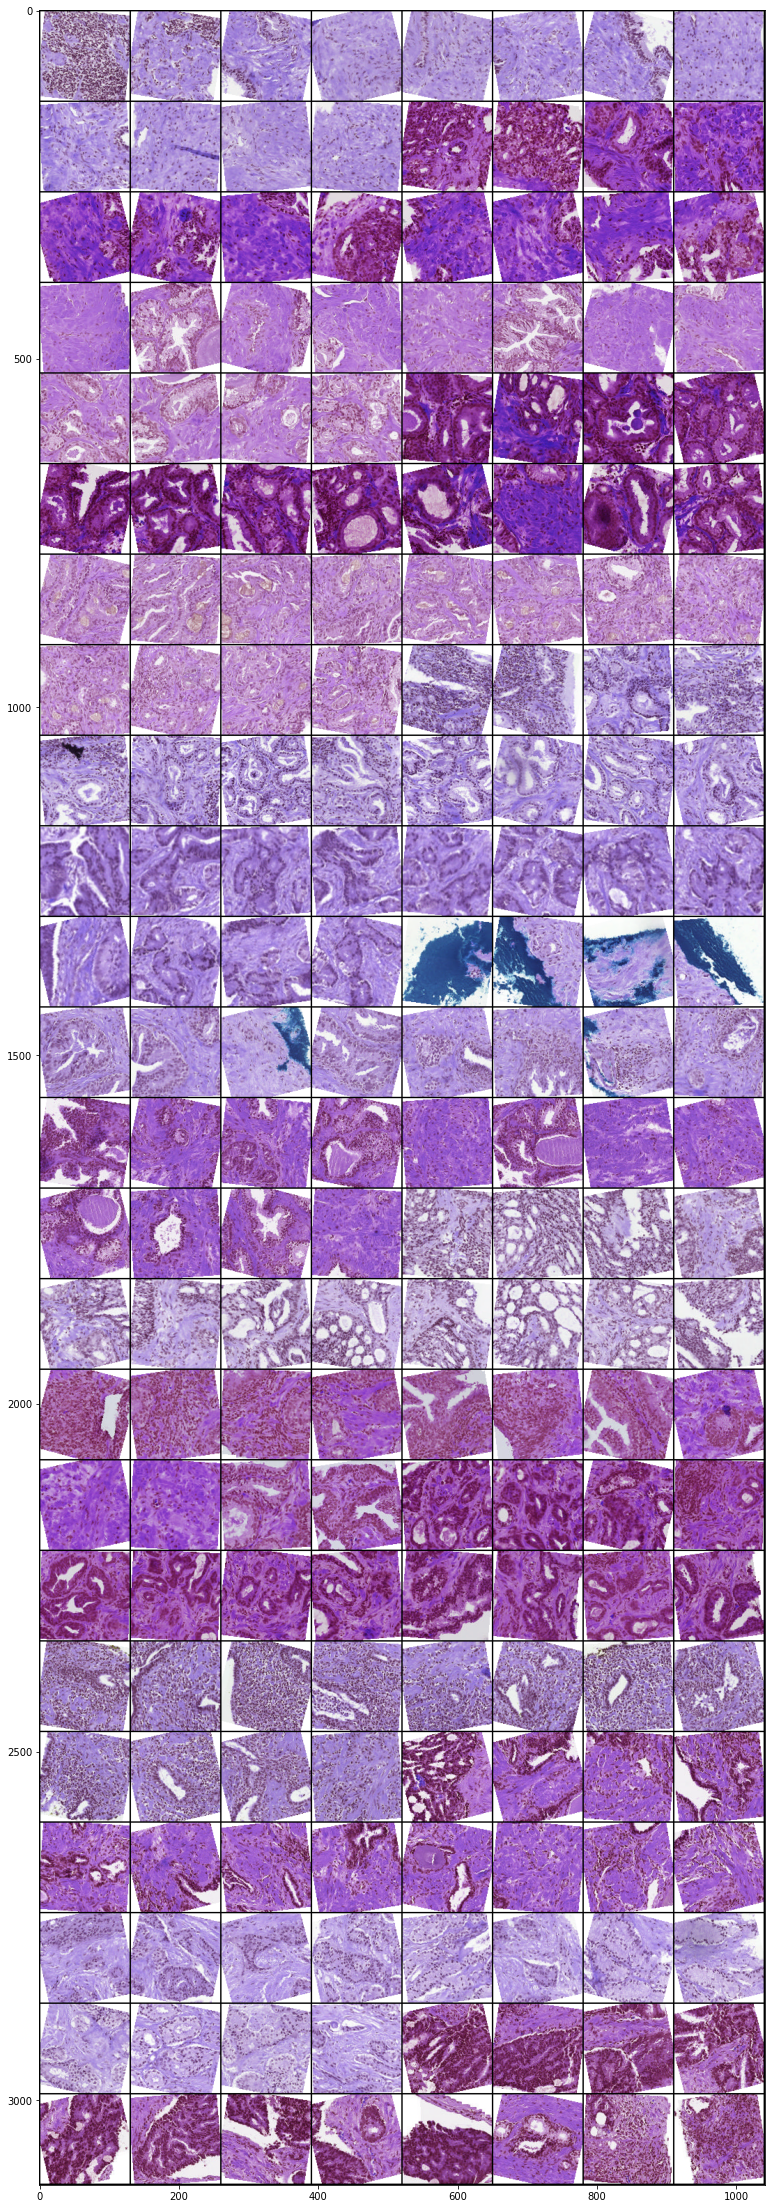

In [6]:
plt.figure(figsize=(20,40))
teacher_images = teacher_images.reshape(-1, 3, 128, 128)
imshow(torchvision.utils.make_grid(teacher_images))

In [7]:
checkpoint_path = os.path.join(os.getcwd(), "checkpoint", model.model_name)
checkpoint_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    save_top_k = 5,
    verbose = True,
    monitor = 'kappa_score/kappa_score',
    mode = 'max'
)

checkpoint_path

/home/kientiet/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: Checkpoint directory /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/outliers/resnet50 exists and is not empty with save_top_k != 0.All files in this directory will be deleted when a checkpoint is saved!
  warnings.warn(*args, **kwargs)


'/home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/outliers/resnet50'

In [8]:
tb_logger = loggers.TensorBoardLogger('logs/', name = model.model_name)
trainer = pl.Trainer(checkpoint_callback = checkpoint_callback,
                    nb_sanity_val_steps = 0, 
                    max_epochs = max_epoches, 
                    gpus = -1, 
                    logger = tb_logger)

INFO:lightning:GPU available: True, used: True
INFO:lightning:CUDA_VISIBLE_DEVICES: [0]


# Learning finder

In [9]:
# lr_finder = trainer.lr_find(model, min_lr = 1e-8, max_lr = 5., num_training = 200)

In [10]:
# fig = lr_finder.plot(suggest = True)

In [11]:
model.configure_optimizers()



>> Running with exp scheduler


Lookahead (
Parameter Group 0
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.005
    lr: 0.005
    step_counter: 0
    weight_decay: 5e-05
)

## Start to train

In [ ]:
trainer.fit(model)

INFO:lightning:
    | Name                                     | Type              | Params
---------------------------------------------------------------------------
0   | encoder                                  | ResNetModel       | 23 M  
1   | encoder.encoder                          | Sequential        | 23 M  
2   | encoder.encoder.0                        | Conv2d            | 9 K   
3   | encoder.encoder.1                        | BatchNorm2d       | 128   
4   | encoder.encoder.2                        | ReLU              | 0     
5   | encoder.encoder.3                        | MaxPool2d         | 0     
6   | encoder.encoder.4                        | Sequential        | 215 K 
7   | encoder.encoder.4.0                      | Bottleneck        | 75 K  
8   | encoder.encoder.4.0.conv1                | Conv2d            | 4 K   
9   | encoder.encoder.4.0.bn1                  | BatchNorm2d       | 128   
10  | encoder.encoder.4.0.conv2                | Conv2d            | 36 



>> Running with exp scheduler
>> Return trainloader
>> Return valloader


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha)


INFO:lightning:
Epoch 00000: kappa_score/kappa_score reached 0.34037 (best 0.34037), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/outliers/resnet50/epoch=0_v6.ckpt as top 5


INFO:lightning:
Epoch 00001: kappa_score/kappa_score reached -0.08233 (best 0.34037), saving model to /home/kientiet/Documents/My Project/python/panda-kaggle/checkpoint/outliers/resnet50/epoch=1_v4.ckpt as top 5
